In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
titanic = pd.read_csv(os.path.normpath(os.getcwd() + os.sep + os.pardir) + '/data/titanic-train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()
titanic.describe(include=['O'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [4]:
titanic.isnull().sum().sort_values(ascending=False)

print("Data Shape: There are {:,.0f} rows and {:,.0f} columns.\nMissing values = {}, Duplicates = {}.\n".
      format(titanic.shape[0], titanic.shape[1],titanic.isna().sum().sum(), titanic.duplicated().sum()))



Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Data Shape: There are 891 rows and 12 columns.
Missing values = 866, Duplicates = 0.



<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, 'Missing Data Heatmap')

<Axes: title={'center': 'Missing Data Heatmap'}>

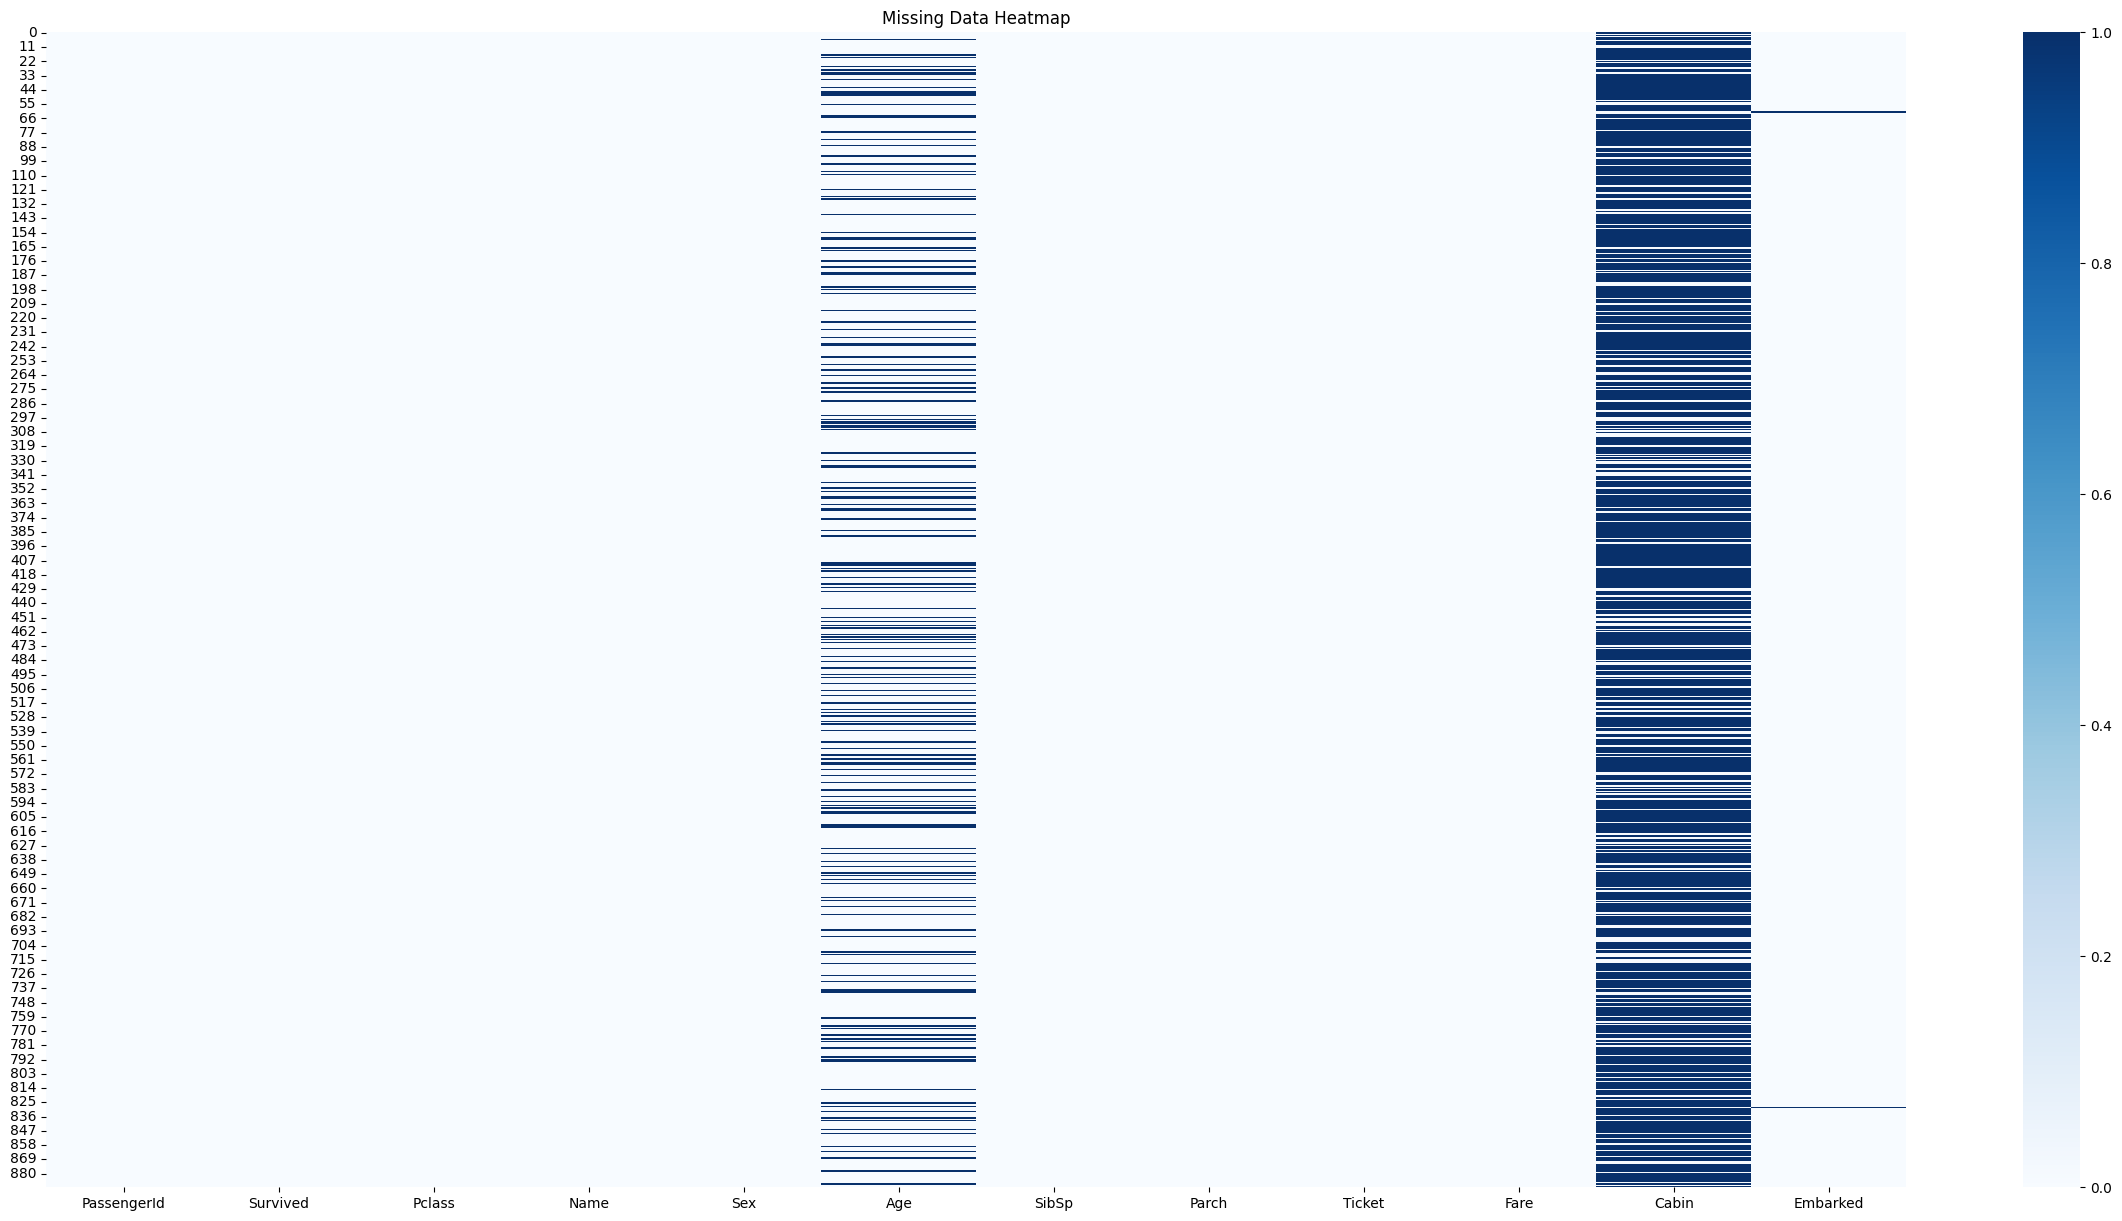

In [107]:
# Visualize missing data using a heatmap
plt.figure(figsize=(30,15))
plt.title("Missing Data Heatmap")
sns.heatmap(titanic.isnull(), cmap="Blues")
plt.show()

<Axes: >

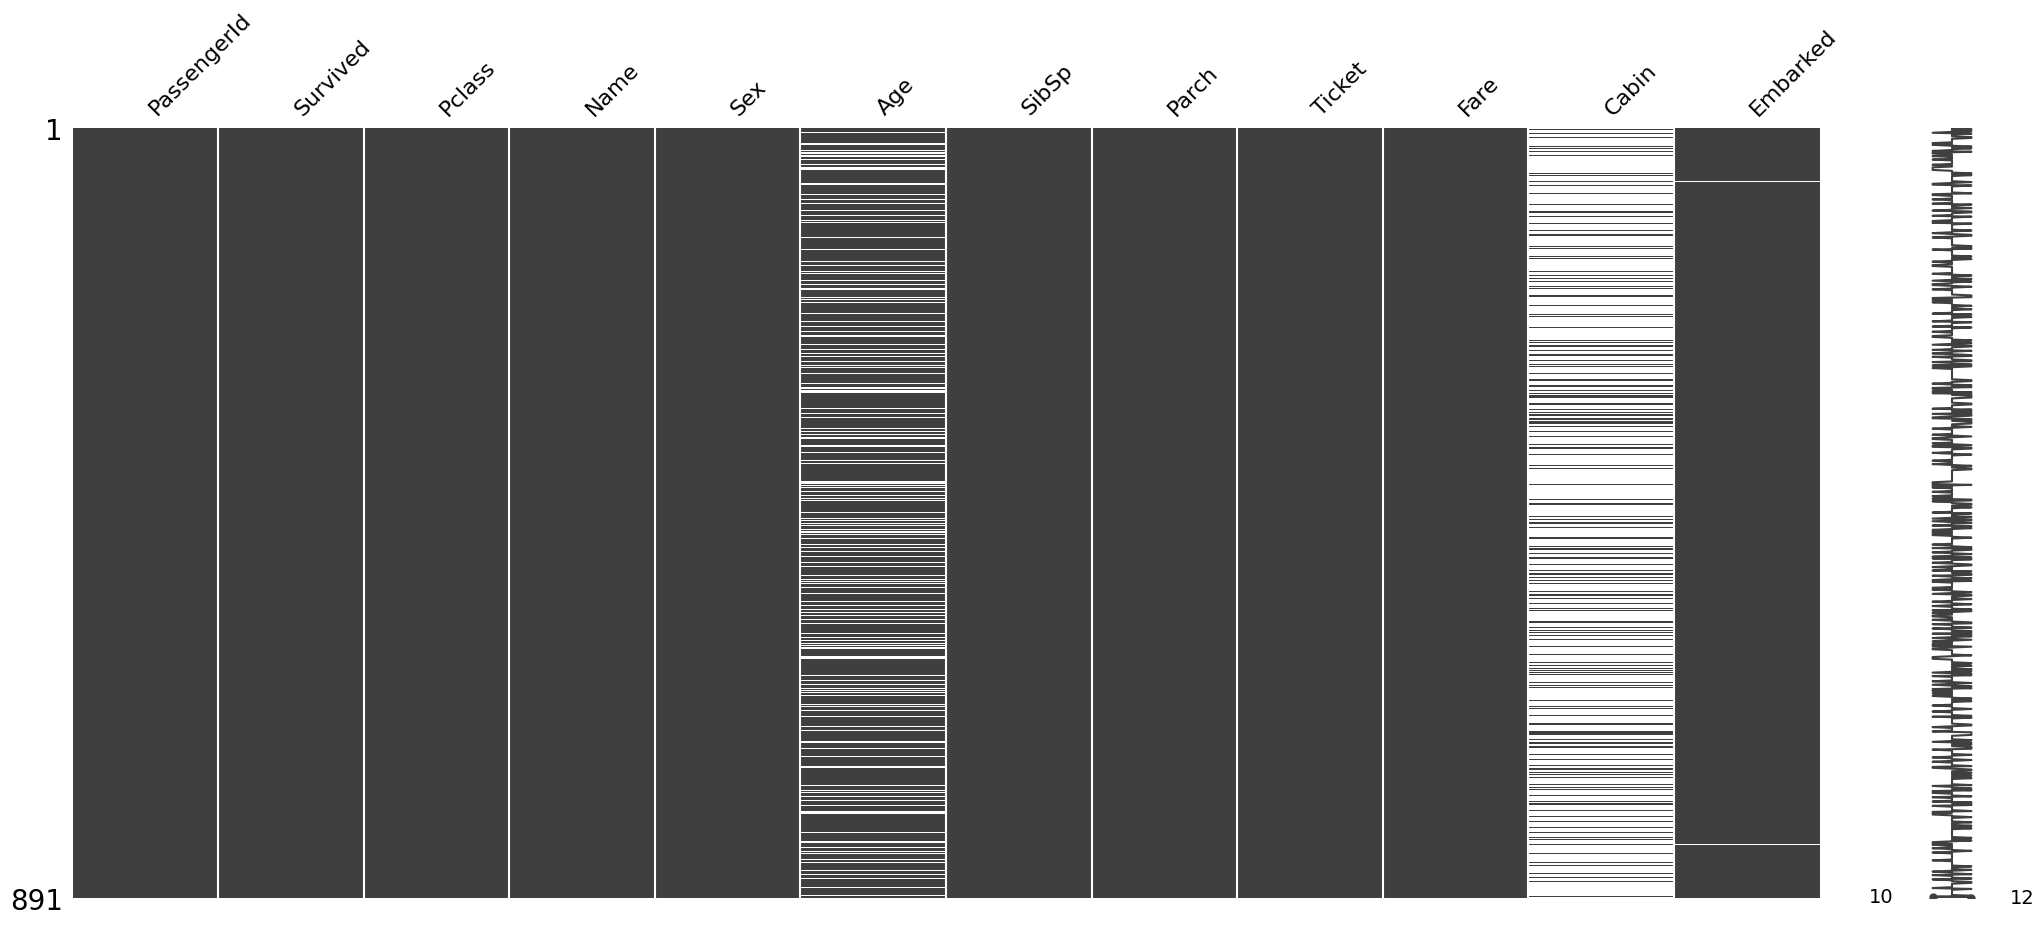

In [5]:
import missingno as msno
msno.matrix(titanic)

<Axes: ylabel='count'>

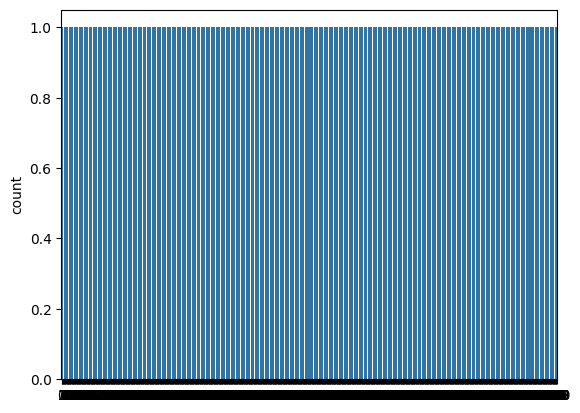

In [7]:
sns.countplot(titanic['Embarked'].isnull())

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

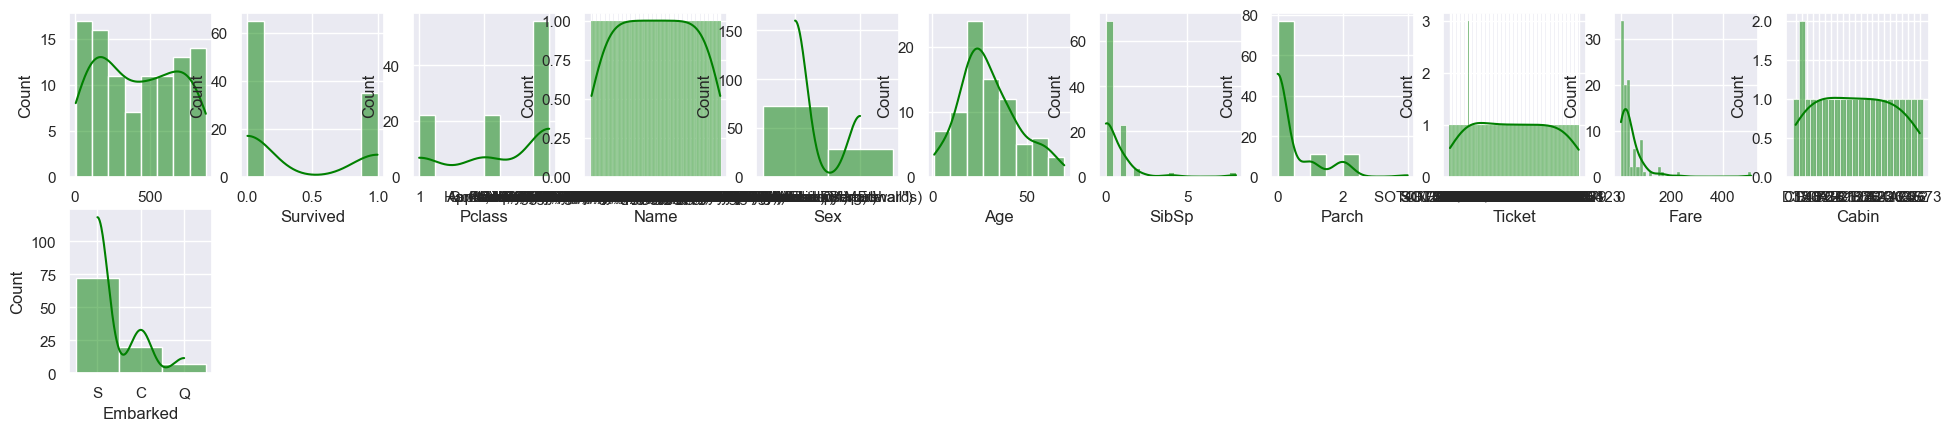

In [110]:
sns.set(rc={'figure.figsize':(24,20)})
for i, column in enumerate(list(titanic.columns), 1):
    plt.subplot(8,11,i)
    p=sns.histplot(x=column,data=titanic.sample(100),stat='count',kde=True,color='green')

In [166]:
n = titanic['Cabin'].nunique()
print("Number of Unique categories:", n)
missing_per = (titanic['Cabin'].isnull().sum()/ titanic['Cabin'].size) * 100
print('Missing percentage: %.2f'% missing_per)

Number of Unique categories: 147
Missing percentage: 77.10


In [4]:
#Deletion - Columns with NAN
df = titanic.copy()
df = df.dropna(axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [144]:
#Deletion - Rows with NAN
dfr = titanic.copy()
dfr.dropna(inplace=True)
dfr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [145]:
print("After Column removal:", df.shape)
print("After Rows removal:", dfr.shape)

After Column removal: (891, 9)
After Rows removal: (183, 12)


In [8]:
#Mean imputation
dfm = titanic.copy()
dfm['Age'] = dfm['Age'].replace(np.NaN, dfm['Age'].mean())
dfm['Age'].mean()

# or
from sklearn.impute import SimpleImputer
dfmean = titanic.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_fit = imp.fit(np.array(dfmean['Age']).reshape(-1,1))
dfmean['Age'] = imp_fit.transform(np.array(dfmean['Age']).reshape(-1,1))
dfmean['Age'].mean()

29.69911764705882

29.69911764705882

In [9]:
#Fill a constant value
dfval = titanic.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=10000)
imp = imp.fit(np.array(dfval['Age']).reshape(-1,1))
dfval['Age'] = imp.transform(np.array(dfval['Age']).reshape(-1,1))
dfval[dfval['Age'] > 100]

0

In [32]:
bin_edges = [0, 20, 40, 60, 80, 100, 10001]
hist, bins = np.histogram(dfval['Age'], bins=bin_edges)
hist

array([164, 387, 137,  25,   1, 177], dtype=int64)

(array([714.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 177.]),
 array([4.200000e-01, 1.000378e+03, 2.000336e+03, 3.000294e+03,
        4.000252e+03, 5.000210e+03, 6.000168e+03, 7.000126e+03,
        8.000084e+03, 9.000042e+03, 1.000000e+04]),
 <BarContainer object of 10 artists>)

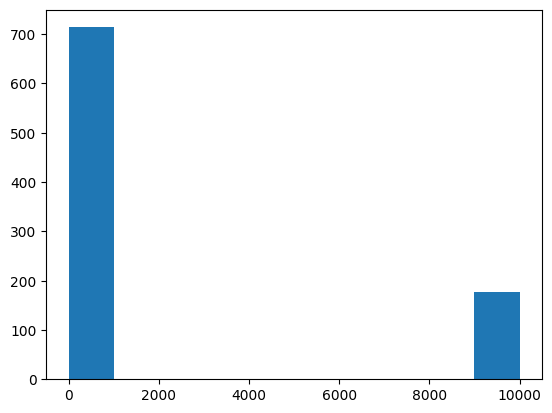

In [43]:
n = plt.hist(dfval['Age'], bins=10)
n

In [ ]:
#Median imputation
dfmed = titanic.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(np.array(dfmed['Age']).reshape(-1,1))
dfmed['Age'] = imp.transform(np.array(dfmed['Age']).reshape(-1,1))
dfmed['Age'].isna().sum()

In [50]:
#Categorical - Mode imputation
dfmode = titanic.copy()
embarked_na = dfmode[dfmode['Embarked'].isna()]
embarked_na

dfmode['Embarked'] = dfmode['Embarked'].replace(np.NaN, dfmode['Embarked'].mode()[0])
print("\nAfter imputing:")
dfmode.iloc[embarked_na.index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN



After imputing:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [23]:
#Categorical - unique category
dfm['Cabin'] = dfm['Cabin'].fillna('ZZZ')
dfm['Cabin'].unique()

array(['ZZZ', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [197]:
# Hot deck imputation
dfhot = titanic.copy()
for i in range(dfhot.shape[1]):
    missing_mask = pd.isna(dfhot.iloc[:, i])
    if np.any(missing_mask):
        col_name = dfhot.iloc[:, i].name
        non_missing_vals = dfhot.loc[~missing_mask, col_name]
        replace_with = np.random.choice(non_missing_vals)
        dfhot.loc[missing_mask, col_name] = replace_with

dfhot.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [121]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, 9, 5],
                    [np.nan, 3, np.nan, 4]],
                   columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,9.0,5
3,NaN,3.0,NaN,4


In [127]:
#LOCF - last observation carried forward or Forward Fill
df1 = df.copy()
df1.fillna(method='ffill', inplace=True)
df1

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_6800\146328827.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,9.0,5
3,3.0,3.0,9.0,4


In [131]:
# Replace with Maximum Value/ Minimum value
df2 = df.copy()
df2['A'] = df2['A'].fillna(df2['A'].max())

# Replace with Minimum Value
df2['B'] = df2['B'].fillna(df2['B'].min())
df2

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,2.0,9.0,5
3,3.0,3.0,NaN,4


In [294]:
#Interpolate
df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.5,9.0,5
3,3.0,3.0,9.0,4


### KNN Imputation

In [65]:
from sklearn.impute import KNNImputer
horse = pd.read_csv(os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data/horse-colic.csv", header=None, na_values='?')
horse

#import requests
#from bs4 import BeautifulSoup
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.names"
#req = requests.get(url)
#for i in req.iter_lines():
#    print(i)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [88]:
horse_X = horse[horse.columns[~horse.columns.isin([23])]]
horse_Y = horse[horse.columns[horse.columns.isin([23])]]
nulldf = horse_X.loc[:, horse_X.isnull().sum() > 0]
non_null_df = horse_X.loc[:, horse_X.isnull().sum() == 0]
nulldf.isnull().sum()

0       1
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
dtype: int64

In [112]:
imputer = KNNImputer()
imputer.fit(nulldf)
x_trans = imputer.transform(nulldf)
imputed_df = pd.DataFrame(x_trans, columns=nulldf.columns)
imputed_df.isnull().sum()

KNNImputer()

0     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [113]:
final_df = non_null_df.join(imputed_df)
final_df

,1,2,24,25,26,27,0,3,4,5,...,13,14,15,16,17,18,19,20,21,22
0,1,530101,11300,0,0,2,2.0,38.50,66.0,28.0,...,2.6,1.8,5.70,3.0,5.0,45.0,8.40,1.4,3.94,2.0
1,1,534817,2208,0,0,2,1.0,39.20,88.0,20.0,...,1.8,1.2,2.66,4.0,2.0,50.0,85.00,2.0,2.00,3.0
2,1,530334,0,0,0,1,2.0,38.30,40.0,24.0,...,2.0,1.4,5.26,1.0,1.0,33.0,6.70,1.6,3.88,1.0
3,9,5290409,2208,0,0,1,1.0,39.10,164.0,84.0,...,1.0,2.0,5.00,3.0,4.0,48.0,7.20,3.0,5.30,2.0
4,1,530255,4300,0,0,2,2.0,37.30,104.0,35.0,...,1.6,1.8,4.60,3.8,4.4,74.0,7.40,2.4,3.56,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,533886,3205,0,0,2,1.0,38.36,120.0,70.0,...,1.8,1.4,2.20,3.6,5.0,55.0,65.00,2.6,2.46,3.0
296,1,527702,2208,0,0,1,2.0,37.20,72.0,24.0,...,3.0,1.0,5.30,4.0,4.0,44.0,6.74,3.0,3.30,3.0
297,1,529386,3205,0,0,2,1.0,37.50,72.0,30.0,...,2.0,1.0,5.60,3.0,5.0,60.0,6.80,2.2,3.48,2.0
298,1,530612,2208,0,0,1,1.0,36.50,100.0,24.0,...,3.0,1.0,5.84,4.0,4.0,50.0,6.00,3.0,3.40,1.0


### Regression imputation

In [137]:
# Example DataFrame
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({
    'age': [25, np.nan, 35, 40, np.nan, 30],
    'income': [50000, 60000, 55000, 80000, 75000, 62000],
    'education': [12, 16, 14, 18, 16, 13]
})

# Split based on missing 'age'
df_obs = df[df['age'].notnull()]
df_mis = df[df['age'].isnull()]


# Fit model on observed data
reg = LinearRegression()
reg.fit(df_obs[['income', 'education']], df_obs['age'])

# Predict missing ages
predicted_ages = reg.predict(df_mis[['income', 'education']])

# Impute
df_impute = df.copy()
df_impute.loc[df['age'].isnull(), 'age'] = predicted_ages
df_impute


LinearRegression()

,age,income,education
0,25.000000,50000,12
1,38.307336,60000,16
2,35.000000,55000,14
3,40.000000,80000,18
4,35.569078,75000,16
5,30.000000,62000,13


In [139]:
#Add Residual Noise (Stochastic Regression Imputation)
# Calculate residuals from training
residuals = df_obs['age'] -  reg.predict(df_obs[['income', 'education']])
std = residuals.std()

# Add random noise to predictions
predicted_ages_stochastic = predicted_ages + np.random.normal(0, std, size=predicted_ages.shape)

# Impute with noise
df_stochstic_impute = df.copy()
df_stochstic_impute.loc[df_stochstic_impute['age'].isnull(), 'age'] = predicted_ages_stochastic
df_stochstic_impute

,age,income,education
0,25.000000,50000,12
1,36.402516,60000,16
2,35.000000,55000,14
3,40.000000,80000,18
4,36.528425,75000,16
5,30.000000,62000,13


### MICE (Multivariate Imputation by Chained Equation)

In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Introduce some missing values randomly
rng = np.random.RandomState(42)
missing_mask = rng.rand(*df.shape) < 0.1  # 10% missing
df_missing = df.mask(missing_mask)
df_missing.isnull().sum()

age    47
sex    46
bmi    46
bp     40
s1     43
s2     40
s3     52
s4     54
s5     54
s6     55
dtype: int64

In [61]:
imp = IterativeImputer(random_state=0, max_iter=10)
imputed = imp.fit_transform(df_missing)
df_imputed = pd.DataFrame(imputed,  columns=df.columns)
df_imputed

C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.044174,-0.002592,0.019907,-0.017646
1,-0.025960,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,0.017517
3,-0.089063,-0.044642,0.011477,-0.036656,0.012191,0.024991,-0.036038,0.032139,0.022688,-0.009362
4,0.005383,-0.044642,-0.004129,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.020926,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.015172,0.003318,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.051804,-0.016395,-0.006430
439,0.041708,0.050680,-0.015906,0.009470,-0.037344,-0.013840,-0.024993,0.000304,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Validation methods

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Change After MICE Imputation')

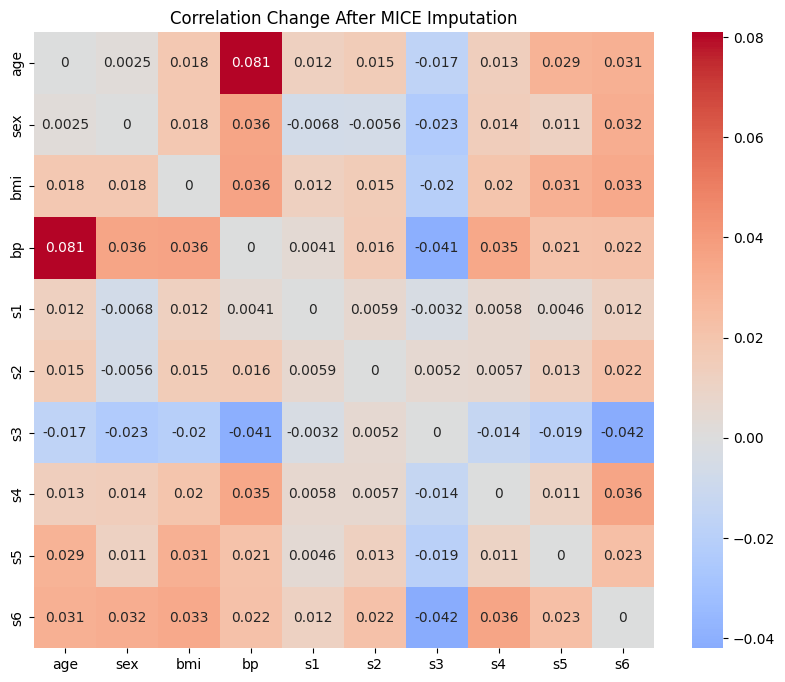

In [62]:
# Correlation validation
corr_original = df.corr()
corr_imputed = df_imputed.corr()

# Difference in correlation
corr_diff = corr_imputed - corr_original

plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Change After MICE Imputation")
plt.show()


<Figure size 640x480 with 0 Axes>

<Axes: xlabel='0', ylabel='Density'>

<Axes: xlabel='0', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 0')

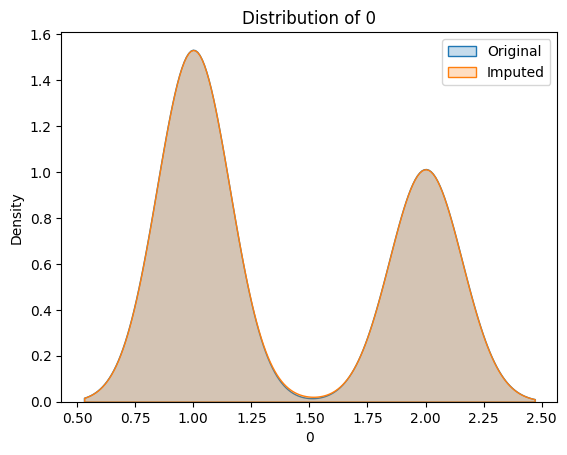

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='3', ylabel='Density'>

<Axes: xlabel='3', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 3')

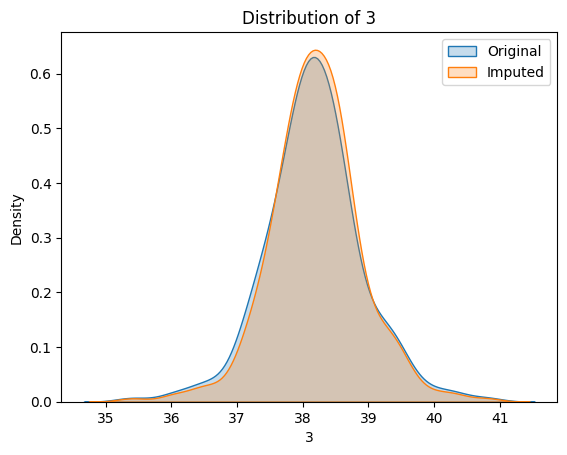

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='4', ylabel='Density'>

<Axes: xlabel='4', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 4')

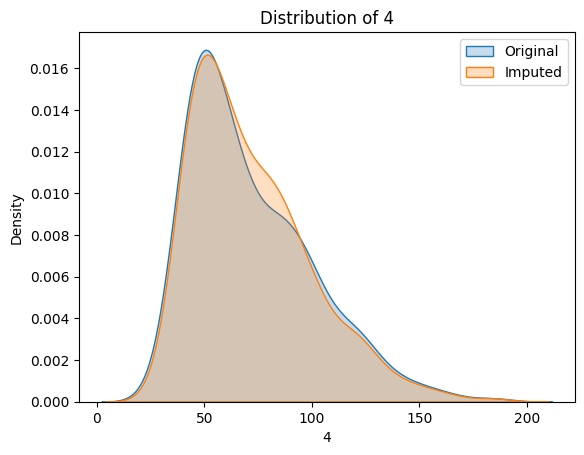

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='5', ylabel='Density'>

<Axes: xlabel='5', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 5')

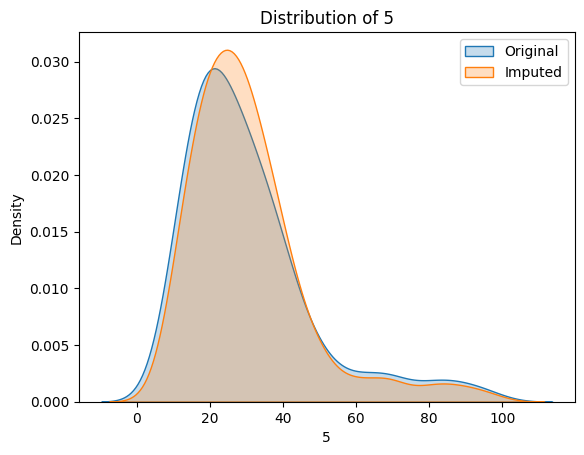

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='6', ylabel='Density'>

<Axes: xlabel='6', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 6')

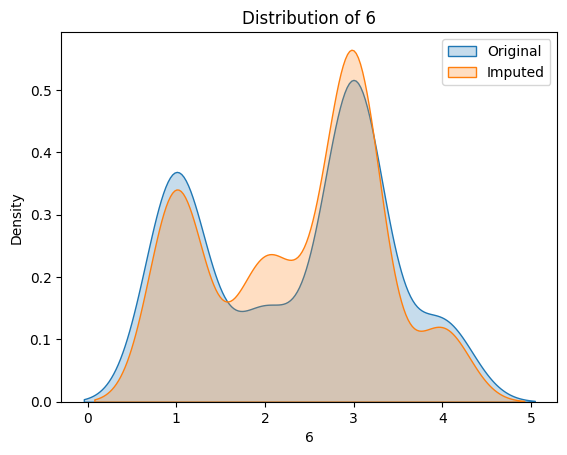

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='7', ylabel='Density'>

<Axes: xlabel='7', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 7')

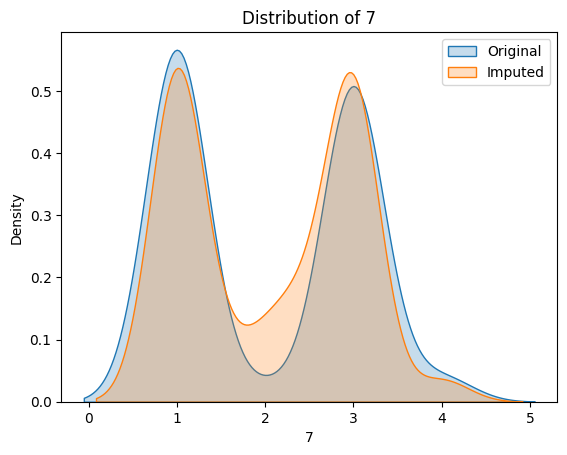

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='8', ylabel='Density'>

<Axes: xlabel='8', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 8')

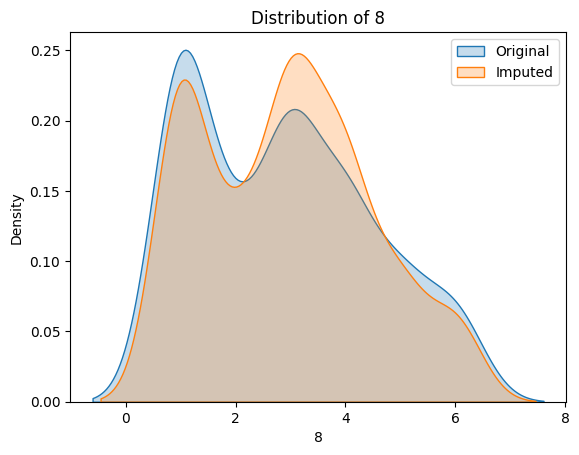

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='9', ylabel='Density'>

<Axes: xlabel='9', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 9')

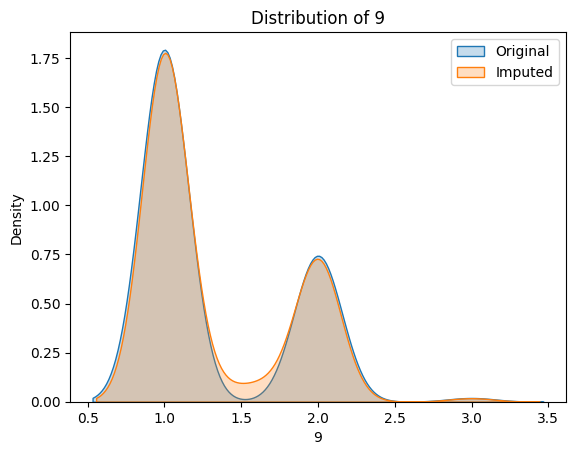

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='10', ylabel='Density'>

<Axes: xlabel='10', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 10')

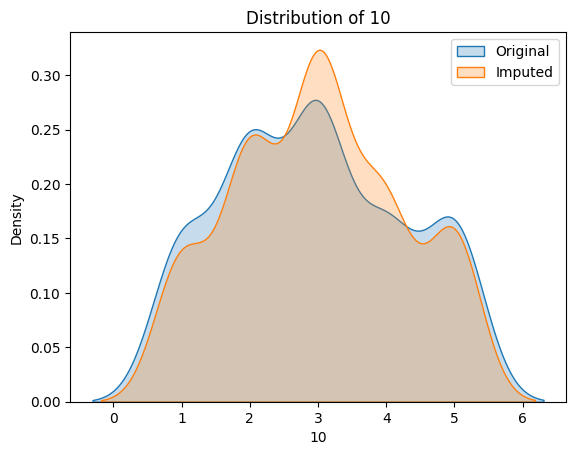

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='11', ylabel='Density'>

<Axes: xlabel='11', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 11')

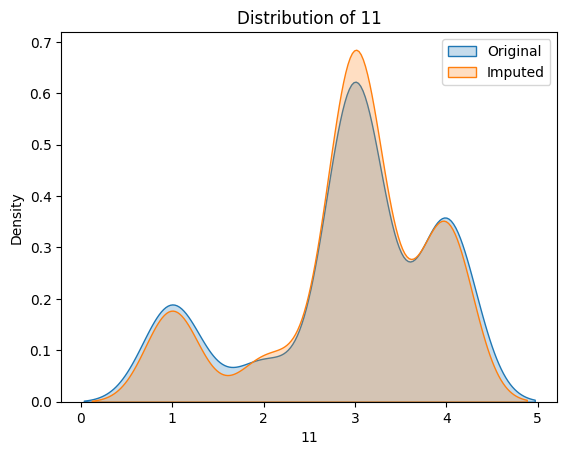

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='12', ylabel='Density'>

<Axes: xlabel='12', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 12')

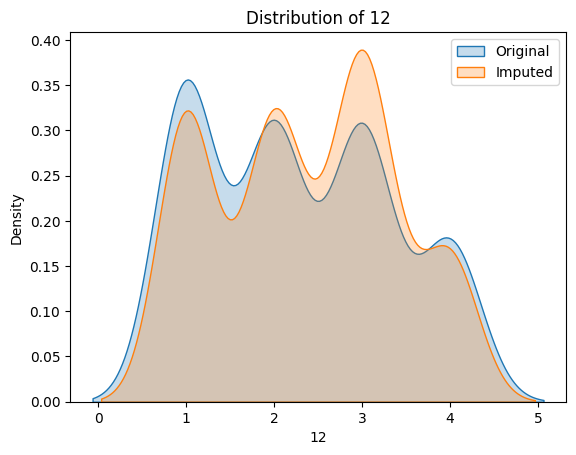

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='13', ylabel='Density'>

<Axes: xlabel='13', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 13')

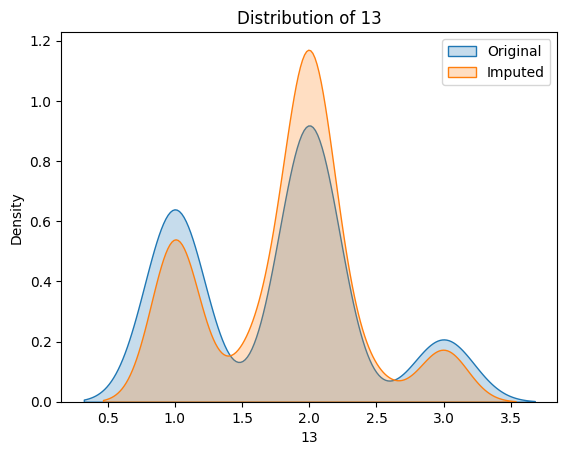

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='14', ylabel='Density'>

<Axes: xlabel='14', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 14')

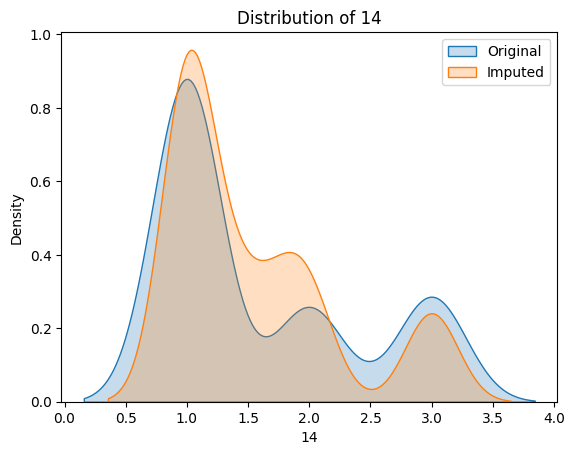

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='15', ylabel='Density'>

<Axes: xlabel='15', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 15')

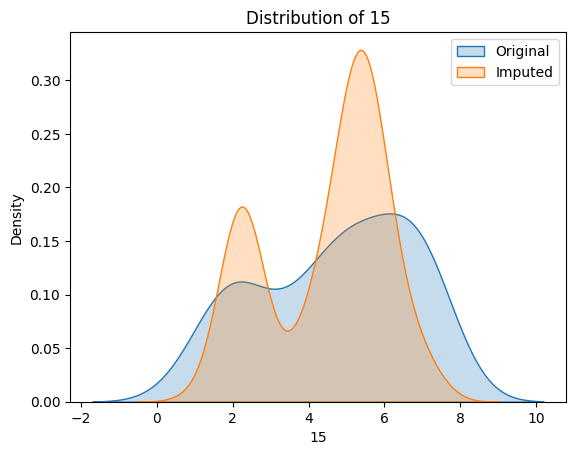

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='16', ylabel='Density'>

<Axes: xlabel='16', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 16')

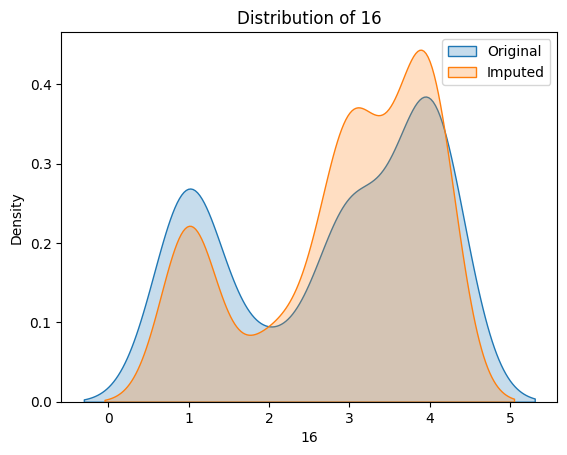

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='17', ylabel='Density'>

<Axes: xlabel='17', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 17')

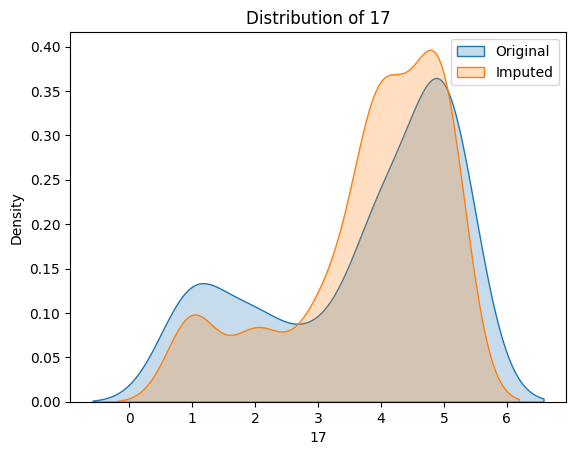

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='18', ylabel='Density'>

<Axes: xlabel='18', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 18')

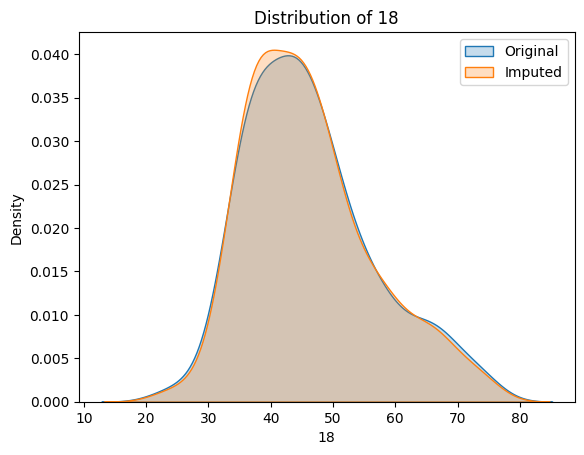

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='19', ylabel='Density'>

<Axes: xlabel='19', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 19')

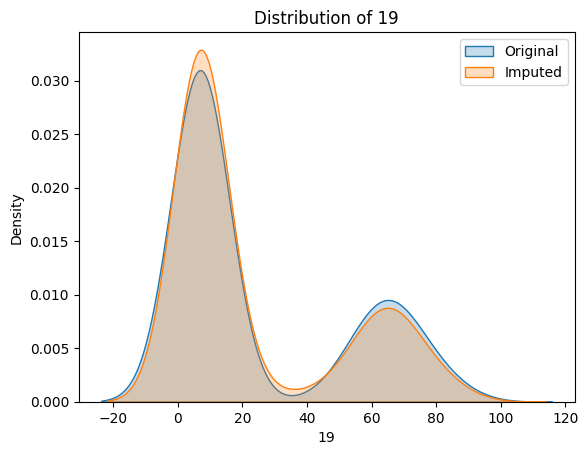

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='20', ylabel='Density'>

<Axes: xlabel='20', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 20')

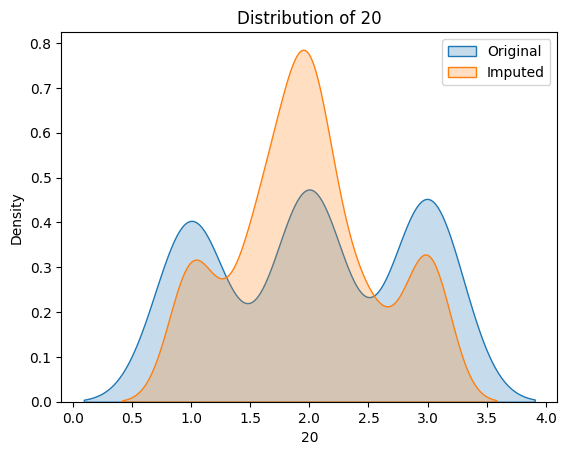

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='21', ylabel='Density'>

<Axes: xlabel='21', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 21')

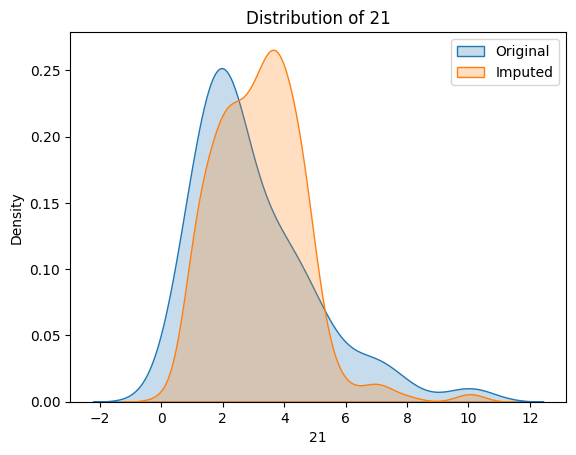

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='22', ylabel='Density'>

<Axes: xlabel='22', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of 22')

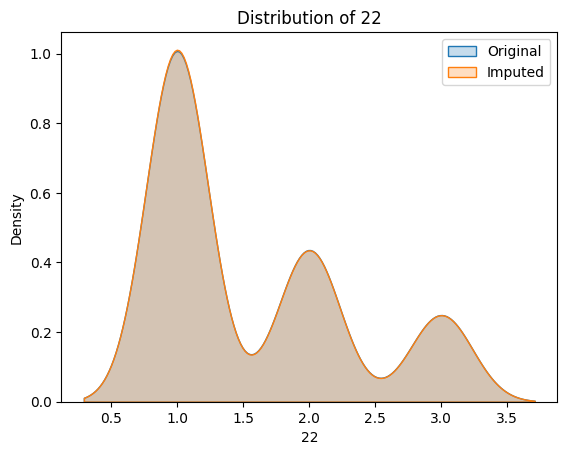

In [121]:
#Distribution check
import matplotlib.pyplot as plt

for col in imputed_df.columns:
    if final_df[col].dtype in ['float64', 'int64']:
        plt.figure()
        sns.kdeplot(nulldf[col].dropna(), label='Original', fill=True)
        sns.kdeplot(imputed_df[col], label='Imputed', fill=True)
        plt.title(f"Distribution of {col}")
        plt.legend()
        plt.show()


In [2]:
#Prediction imputation
#cold deck
#unsupervised models
